In [ ]:
#first ,install the necessary library
!pip install nltk



In [ ]:
import nltk
from nltk.chat.util import Chat, reflections

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')

# Define the chatbot's knowledge base (question-answer pairs)
pairs = [
    (r"(hi|hello|hey|howdy)", ["Hello!", "Hi there!", "Hey! How can I help you today?"]),
    (r"how are you?", ["I'm doing great, thanks for asking!", "I'm good, how about you?"]),
    (r"what is your name?", ["I am a chatbot named Sam."]),
    (r"quit|bye", ["Goodbye! Have a great day!", "Bye! Feel free to chat again."]),
    (r"tell me a joke", ["Why don't scientists trust atoms? Because they make up everything!"]),
    (r"tell me a fact", ["Did you know that honey never spoils? Archaeologists have found pots of honey in ancient tombs that are over 3,000 years old!"]),

    # Technology-related questions
    (r"what's the latest tech gadget you've been excited about?", ["I think the new iPhone or the latest AI assistants are always exciting!"]),
    (r"how do you think AI will impact our daily lives in the next 10 years?", ["AI will likely transform everything from healthcare to entertainment, making tasks faster and more personalized."]),
    (r"what’s your favorite operating system—windows, macos, or linux?", ["I don't have preferences, but many developers love Linux for its flexibility."]),
    (r"do you prefer smart home devices like Alexa or Google Home?", ["Both Alexa and Google Home are pretty cool, but it depends on the ecosystem you use more."]),
    (r"are you a fan of virtual reality? what game or app do you think uses VR best?", ["I think VR games like 'Beat Saber' and 'Half-Life: Alyx' are awesome! VR technology has come a long way."]),

    # Dinner preferences
    (r"what do you like to eat for dinner?", ["I don't eat, but if I could, I'd probably enjoy some pizza or pasta!"]),
    (r"what's your favorite type of cuisine?", ["I think Italian food is delicious—pasta, pizza, and more!"]),
    (r"can you recommend a good dinner recipe?", ["How about trying a classic spaghetti carbonara? It's easy and delicious."]),

    # Favorite games
    (r"what's your favorite video game?", ["There are so many good ones! But I think 'The Legend of Zelda: Breath of the Wild' is a masterpiece."]),
    (r"do you like playing games? what's your favorite?", ["If I could play, I'd probably enjoy strategy games like 'Civilization VI' or action games like 'The Witcher 3'."]),
    (r"what game do you think is the best of all time?", ["Many would argue that games like 'The Legend of Zelda: Ocarina of Time' or 'Super Mario Bros.' are the best."]),

    # Default response for unrecognized input
    (r"(.*)", ["Sorry, I didn't quite understand that. Could you please rephrase?"])
]

# Create the chatbot
def chatbot():
    print("Hi! I'm a simple chatbot. Type 'quit' to exit.")

    # Initialize the Chat class with the pairs and reflections
    chatbot = Chat(pairs, reflections)

    try:
        while True:
            user_input = input("You: ")
            if user_input.lower() == 'quit':  # Check if the user wants to exit
                print("Chatbot: Goodbye!")
                break
            else:
                response = chatbot.respond(user_input)  # Get the chatbot's response
                print(f"Chatbot: {response}")
    except KeyboardInterrupt:
        print("\nChatbot: Goodbye!")
        return

# Run the chatbot
chatbot()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Hi! I'm a simple chatbot. Type 'quit' to exit.
Chatbot: Hey! How can I help you today?
Chatbot: I think the new iPhone or the latest AI assistants are always exciting!
Chatbot: I don't have preferences, but many developers love Linux for its flexibility.
Chatbot: Sorry, I didn't quite understand that. Could you please rephrase?

Chatbot: Goodbye!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess dataset
data = pd.read_csv('/content/Housing.csv')
le = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = le.fit_transform(data[col])

# Define features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features]
y = data['price']
price_median = y.median()
data['price_category'] = (data['price'] > price_median).astype(int)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression model
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

# Binary classification model
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, data['price_category'], test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42).fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)
print("Confusion Matrix:", confusion_matrix(y_test_class, y_pred_class))
fpr, tpr, _ = roc_curve(y_test_class, classifier.predict_proba(X_test_class)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# User input function
def get_user_input():
    area = float(input("Enter area of the house: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    parking = int(input("Enter number of parking spaces: "))
    return np.array([[area, bedrooms, bathrooms, stories, parking]])

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)
print(f"Predicted Price: {regressor.predict(user_input_scaled)[0]:.2f}")
print(f"Price Category: {'Above' if classifier.predict(user_input_scaled)[0] == 1 else 'Below'} Median")

In [ ]:
import nltk
from nltk.chat.util import Chat, reflections

# Define chatbot responses with playful and affectionate tone
pairs = [
    (r"(hi|hello|hey|howdy)", ["Hey, love! How are you?", "Hello, beautiful! What's up?"]),
    (r"how are you?", ["I'm doing great now that I'm talking to you!", "I'm amazing, especially since you're here."]),
    (r"what's your favorite thing about me?", ["I love how you make me smile just by thinking of you."]),
    (r"do you miss me?", ["I miss you more than you can imagine. Every moment without you feels incomplete."]),
    (r"how much do you love me?", ["I love you more than words can express. You're my everything."]),
    (r"what are you thinking?", ["I'm thinking about how lucky I am to have someone as amazing as you."]),
    (r"do you want to be with me?", ["Of course! Every moment with you is a moment I cherish."]),
    (r"what would you do if I was there with you?", ["I'd probably hug you tight and never let you go."]),
    (r"you're so beautiful", ["You're making me blush! You're the one who's gorgeous."]),
    (r"tell me something sweet", ["You light up my life, and I can't wait to spend every day with you."]),
    (r"what's your favorite memory with me?", ["Every moment with you is a memory I hold close to my heart."]),
    (r"you're the best", ["No, you are! I feel so lucky to be with you."]),
    (r"goodnight", ["Goodnight, love. Dream of me, and I'll dream of you."]),
    (r"bye", ["Bye, babe. I'll miss you!"]),
    # Default response for unrecognized input
    (r"(.*)", ["Sorry, I didn't quite understand that. Can you say it again?"])
]

# Create the chatbot
def chatbot():
    print("Hi! I'm your chatbot. Type 'quit' to exit.")

    # Initialize the Chat class with the pairs and reflections
    chatbot = Chat(pairs, reflections)

    try:
        while True:
            user_input = input("You: ")
            if user_input.lower() == 'quit':  # Check if the user wants to exit
                print("Chatbot: Goodbye, love! Take care!")
                break
            else:
                response = chatbot.respond(user_input)  # Get the chatbot's response
                print(f"Chatbot: {response}")
    except KeyboardInterrupt:
        print("\nChatbot: Goodbye! Take care!")
        return

# Run the chatbot
chatbot()


In [ ]:
!pip install transformers
!pip install torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate text based on user input
def generate_response(prompt):
    # Encode the input prompt and generate a response
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, no_repeat_ngram_size=2)

    # Decode and return the generated response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Chatbot interaction loop
def chatbot():
    print("Hi! I'm an advanced GPT-2 chatbot. Type 'quit' to exit.")

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'quit':  # Check if user wants to exit
            print("Chatbot: Goodbye!")
            break
        else:
            response = generate_response(user_input)
            print(f"Chatbot: {response}")

# Run the chatbot
chatbot()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
!pip install transformers
!pip install torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate text based on user input
def generate_response(prompt):
    # Encode the input prompt and generate a response
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, no_repeat_ngram_size=2)

    # Decode and return the generated response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Chatbot interaction loop
def chatbot():
    print("Hi! I'm an advanced GPT-2 chatbot. Type 'quit' to exit.")

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'quit':  # Check if user wants to exit
            print("Chatbot: Goodbye!")
            break
        else:
            response = generate_response(user_input)
            print(f"Chatbot: {response}")

# Run the chatbot
chatbot()

In [ ]:
!pip install transformers
!pip install torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate text based on user input
def generate_response(prompt):
    # Encode the input prompt and generate a response
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, no_repeat_ngram_size=2)

    # Decode and return the generated response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Chatbot interaction loop
def chatbot():
    print("Hi! I'm an advanced GPT-2 chatbot. Type 'quit' to exit.")

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'quit':  # Check if user wants to exit
            print("Chatbot: Goodbye!")
            break
        else:
            response = generate_response(user_input)
            print(f"Chatbot: {response}")

# Run the chatbot
chatbot()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Hi! I'm an advanced GPT-2 chatbot. Type 'quit' to exit.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Chatbot: what is java.lang.Object?):

public class Object { public static void main(String[] args) throws Exception { System.out.println("Hello, world!"); } }
.java
,
 (java.util.concurrent.Future<T>& t) {
- java . util . getClass(t);
 - java
 . javaUtils.getClass("java");
}
The above code is a little bit more complex than the one above, but it's still pretty simple.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Chatbot: what is generalization?

The generalizations are not generalizable. They are just generalized.
. The generalisations are generalizing. There are many different ways to define the generalisation. For example, the following generalised expression is equivalent to the expression:
,
 (1)
(2) (3) .
 and
and
: (4) ,
- (5) and . The following generalized expression can be used to express the same generalising expression. It is not a generalisable expression, but it is a generalized one. In this case, it can also be expressed as: , (6) or . It can even be written as, (7) :
In general, we can


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Chatbot: what is normalization?

The first thing that comes to mind is that the word "normalization" is used to describe the process of changing the way we think about the world. It's not a new concept, but it's a very important one.
. . .
 (The word normalizes to mean "to change the meaning of something.")
, and the second thing is, that we are not normalizing. We are normalising. And that's what we're doing. That's why we have to be very careful about what our words mean. If we say something like "I am normal," we mean something that is not "normative."
-
I'm not saying that you can't say "you


In [ ]:
#HEyy I am Docter Aditya
import nltk
from nltk.chat.util import Chat, reflections

# Define the reflections dictionary
reflections = {
    "i am": "you are",
    "i was": "you were",
    "i": "you",
    "i'm": "you are",
    "i'd": "you would",
    "i've": "you have",
    "i'll": "you will",
    "my": "your",
    "you are": "I am",
    "you were": "I was",
    "you've": "I have",
    "you'll": "I will",
    "your": "my",
    "yours": "mine",
    "you": "me",
    "me": "you"
}

# Define patterns and responses
pairs = [
    [
        r"my name is (.*)",
        ["Hello %1, How can I help you today?",]
    ],
    [
        r"hi|hello|hey",
        ["Hello! How can I assist you with your health today?",]
    ],
    [
        r"what are the symptoms of (.*)",
        ["The symptoms of %1 can vary, but common signs include fever, fatigue, and other specific symptoms. Please consult a doctor for an accurate diagnosis.",]
    ],
    [
        r"(.*) fever(.*)",
        ["For a fever, it’s essential to rest and stay hydrated. If the fever persists, consult a healthcare provider.",]
    ],
    [
        r"(.*)(headache|migraine)(.*)",
        ["For headaches, try resting in a dark, quiet room and stay hydrated. If it’s persistent, consider consulting a doctor.",]
    ],
    [
        r"(.*)medicine for (.*)",
        ["I'm not a doctor, but over-the-counter medications may help. Please consult a healthcare provider for specific advice.",]
    ],
    [
        r"(.*)need a doctor(.*)",
        ["If you need a doctor, you can search for nearby hospitals or clinics, or I can help guide you to some online resources.",]
    ],
    [
        r"thank you|thanks",
        ["You're welcome! Feel free to reach out if you have more questions.",]
    ],
    [
        r"(.*)bye|exit",
        ["Goodbye! Stay healthy and take care.",]
    ],
    [
        r"(.*)",
        ["I'm sorry, I didn't understand that. Could you please rephrase?",]
    ]
]

# Create the chatbot function
def medical_chatbot():
    print("Hello! I am a healthcare chatbot. I can provide general health advice. Type 'bye' to exit.")
    chat = Chat(pairs, reflections)
    chat.converse()

# Run the chatbot
medical_chatbot()


Hello! I am a healthcare chatbot. I can provide general health advice. Type 'bye' to exit.


KeyboardInterrupt: Interrupted by user

In [ ]:
#crm chatbot made by Aditya
import nltk
from nltk.chat.util import Chat, reflections

# Define the reflections dictionary
reflections = {
    "i am": "you are",
    "i was": "you were",
    "i": "you",
    "i'm": "you are",
    "i'd": "you would",
    "i've": "you have",
    "i'll": "you will",
    "my": "your",
    "you are": "I am",
    "you were": "I was",
    "you've": "I have",
    "you'll": "I will",
    "your": "my",
    "yours": "mine",
    "you": "me",
    "me": "you"
}

# Define patterns and responses for the chatbot
pairs = [
    [
        r"my name is (.*)",
        ["Hello %1! How can I assist you today?",]
    ],
    [
        r"hi|hello|hey",
        ["Hello! How can I help you with college-related information?",]
    ],
    [
        r"what courses are offered",
        ["We offer a range of undergraduate and postgraduate courses in various fields such as engineering, business, arts, and sciences. You can visit our website for detailed information.",]
    ],
    [
        r"how to apply for admission",
        ["You can apply online through our official college website. Go to the admissions section, fill in the application form, and submit the required documents.",]
    ],
    [
        r"what is the fee structure for (.*)",
        ["The fee structure for %1 varies by program. You can find a detailed fee breakdown on the college website under the 'Fees' section.",]
    ],
    [
        r"what are the hostel facilities",
        ["We provide separate hostels for male and female students with 24/7 security, Wi-Fi, and mess facilities. For more details, visit our campus facilities page.",]
    ],
    [
        r"(.*)scholarships(.*)",
        ["We offer several merit-based and need-based scholarships. You can find eligibility criteria and application details on the scholarships page of our website.",]
    ],
    [
        r"(.*)campus events(.*)",
        ["Our college hosts various events like cultural festivals, tech fairs, and sports tournaments. Keep an eye on the Events section of our website for upcoming activities.",]
    ],
    [
        r"where is the campus located",
        ["Our campus is located at [Campus Address]. You can find directions and more details on our Contact Us page.",]
    ],
    [
        r"thank you|thanks",
        ["You're welcome! Feel free to ask if you have more questions.",]
    ],
    [
        r"(.*)bye|exit",
        ["Goodbye! Best of luck with your studies!",]
    ],
    [
        r"(.*)",
        ["I'm sorry, I didn't understand that. Could you please rephrase?",]
    ]
]

# Create the chatbot function
def college_crm_chatbot():
    print("Hello! I am your College CRM Assistant. How can I help you today? (Type 'bye' to exit)")
    chat = Chat(pairs, reflections)
    chat.converse()

# Run the chatbot
college_crm_chatbot()


Hello! I am your College CRM Assistant. How can I help you today? (Type 'bye' to exit)
Hello! How can I help you with college-related information?
Our college hosts various events like cultural festivals, tech fairs, and sports tournaments. Keep an eye on the Events section of our website for upcoming activities.


KeyboardInterrupt: Interrupted by user

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

KeyboardInterrupt: 

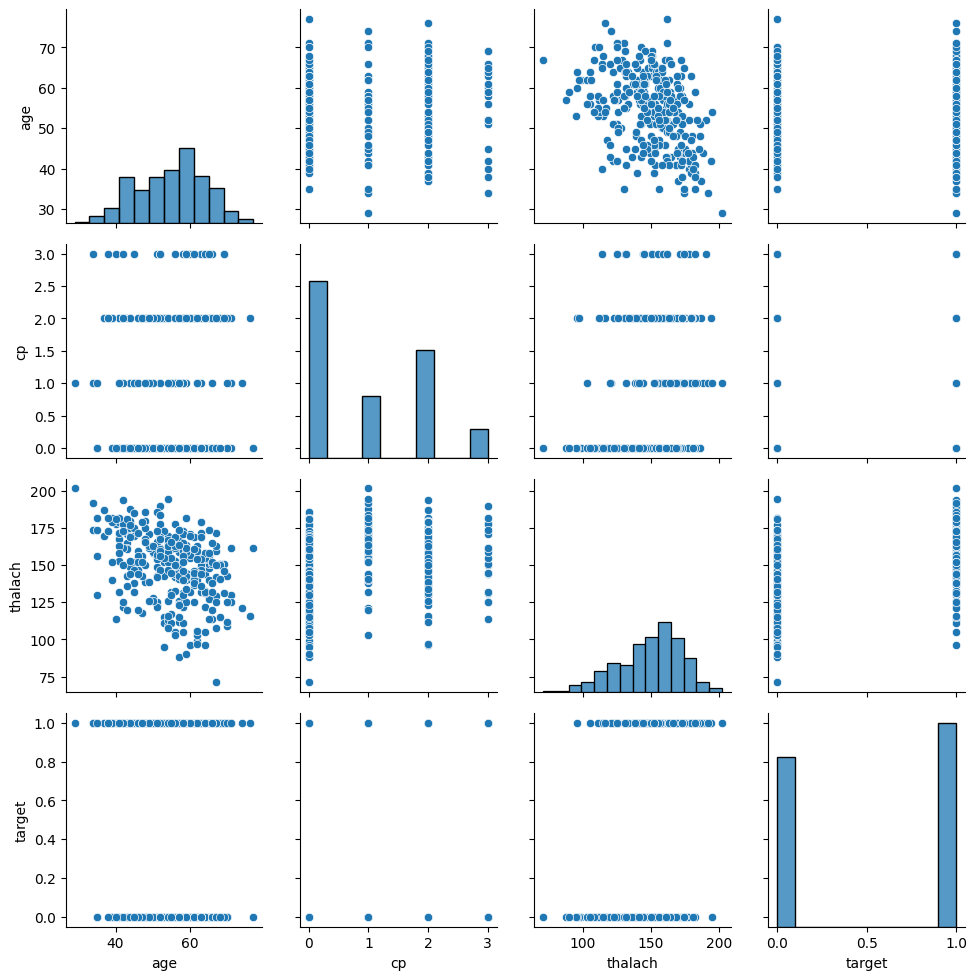

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Corrected typo here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report  # Fixed extra comma

# Load data (replace with actual file path)
df = pd.read_csv('/heart_disease.csv')

# EDA (Exploratory Data Analysis)
print(df.describe())  # Check summary statistics
sns.pairplot(df[["age", "cp", "thalach", "target"]])  # Scatter plot
plt.show()


In [ ]:
# Heatmap to show correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature and target selection
X = df[['age', 'cp', 'thalach']]
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and performance metrics
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Model performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# User input function for prediction
def predict_heart_disease():
    age = int(input("Enter age: "))
    cp = int(input("Enter chest pain type (0-3): "))
    thalach = int(input("Enter maximum heart rate achieved: "))

    user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
    prediction = model.predict(user_data)

    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

# Call the user input function to test
predict_heart_disease()

NameError: name 'plt' is not defined

MSE: 2044165115591.7866, R2: 0.5253182966980272
Confusion Matrix: [[58 28]
 [18 60]]


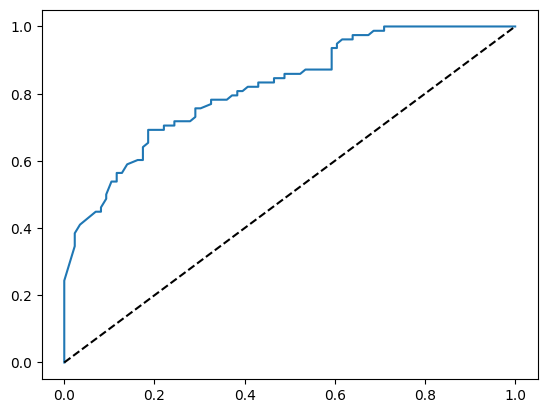

KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess dataset
data = pd.read_csv('/content/Housing (1).csv')
le = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = le.fit_transform(data[col])

# Define features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features]
y = data['price']
price_median = y.median()
data['price_category'] = (data['price'] > price_median).astype(int)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression model
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

# Binary classification model
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, data['price_category'], test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42).fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)
print("Confusion Matrix:", confusion_matrix(y_test_class, y_pred_class))
fpr, tpr, _ = roc_curve(y_test_class, classifier.predict_proba(X_test_class)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# User input function
def get_user_input():
    area = float(input("Enter area of the house: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    parking = int(input("Enter number of parking spaces: "))
    return np.array([[area, bedrooms, bathrooms, stories, parking]])

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)
print(f"Predicted Price: {regressor.predict(user_input_scaled)[0]:.2f}")
print(f"Price Category: {'Above' if classifier.predict(user_input_scaled)[0] == 1 else 'Below'} Median")

    Phone Model  Screen Size (inches)  Resolution (pixels)  Price (USD)  \
0     iPhone 14                  6.10              2962440          799   
1     iPhone 13                  6.10              2962440          699   
2    Galaxy S23                  6.10              2527200          799   
3    Galaxy S22                  6.20              2527200          849   
4     Moto G200                  6.80              2656800          599   
5  Moto Edge 30                  6.50              2592000          449   
6     Nokia X30                  6.43              2592000          350   
7     Nokia G60                  6.58              2592000          250   

   Brightness (nits)  Cluster  
0                800        2  
1                800        2  
2               1200        0  
3               1300        0  
4                600        1  
5                600        1  
6                700        1  
7                700        1  


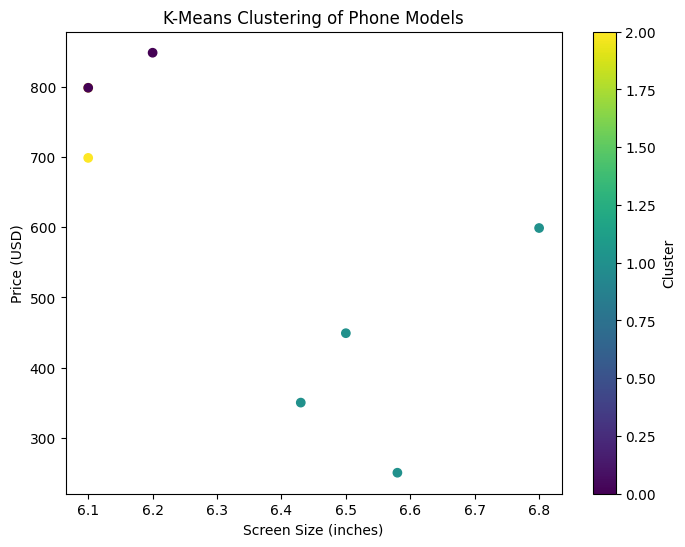

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create a sample dataset of phone displays with features
# For this example, we have: 'Screen Size (inches)', 'Resolution (pixels)', 'Price (USD)', 'Brightness (nits)'

data = {
    'Phone Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30',
                    'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': [2532*1170, 2532*1170, 2340*1080, 2340*1080, 2460*1080, 2400*1080, 2400*1080, 2400*1080],
    'Price (USD)': [799, 699, 799, 849, 599, 449, 350, 250],
    'Brightness (nits)': [800, 800, 1200, 1300, 600, 600, 700, 700]
}

# Step 2: Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data)

# We don't need the 'Phone Model' column for clustering, so we drop it
features = df.drop(columns=['Phone Model'])

# Step 3: Normalize the data (K-Means is sensitive to the scale of features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-Means clustering (let's say we want 3 clusters for now)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Add the cluster labels to the DataFrame
print(df)

# Step 6: Visualize the clusters (we'll use two features for easy plotting: Screen Size and Price)
plt.figure(figsize=(8, 6))
plt.scatter(df['Screen Size (inches)'], df['Price (USD)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (USD)')
plt.title('K-Means Clustering of Phone Models')
plt.colorbar(label='Cluster')
plt.show()


    Student ID        Name  Age   GPA  Cluster
0            1   Student 1   24  3.79        1
1            2   Student 2   21  3.52        1
2            3   Student 3   22  3.18        1
3            4   Student 4   24  2.52        2
4            5   Student 5   20  3.91        1
5            6   Student 6   22  3.34        1
6            7   Student 7   22  3.08        2
7            8   Student 8   24  2.52        2
8            9   Student 9   19  2.85        0
9           10  Student 10   20  2.86        0
10          11  Student 11   24  3.52        1
11          12  Student 12   20  3.41        0
12          13  Student 13   20  3.75        1
13          14  Student 14   22  2.76        2
14          15  Student 15   21  3.09        0
15          16  Student 16   20  2.77        0
16          17  Student 17   23  3.63        1
17          18  Student 18   22  3.14        2
18          19  Student 19   19  2.81        0
19          20  Student 20   21  3.35        1
20          2

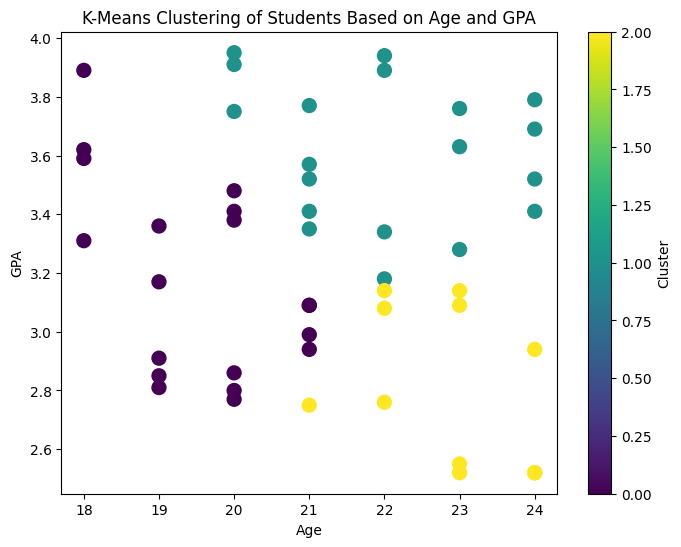

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Generate synthetic student data (if you don't have your CSV)
# If you already have the CSV, you can skip this part.
np.random.seed(42)

num_students = 50  # Number of students

# Random data generation
ages = np.random.randint(18, 25, size=num_students)  # Ages between 18 and 25
gpas = np.round(np.random.uniform(2.5, 4.0, size=num_students), 2)  # GPAs between 2.5 and 4.0
grades = np.random.choice(['A', 'B', 'C'], size=num_students)  # Random grades
departments = np.random.choice(['Computer Science', 'Mathematics', 'Physics', 'Chemistry'], size=num_students)

# Create a DataFrame
student_data = {
    'Student ID': range(1, num_students + 1),
    'Name': [f'Student {i}' for i in range(1, num_students + 1)],
    'Department': departments,
    'Age': ages,
    'Grade': grades,
    'GPA': gpas
}

df = pd.DataFrame(student_data)

# Step 2: Save this data to a CSV file (Optional)
csv_file_path = '/content/student.csv'
df.to_csv(csv_file_path, index=False)

# Step 3: Load the CSV data (simulating what you already have)
df = pd.read_csv(csv_file_path)

# Step 4: Select features for clustering (Age and GPA)
features = df[['Age', 'GPA']]

# Step 5: Preprocess the data (scale the features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Apply K-Means clustering (let's say we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 7: Display the dataframe with cluster labels
print(df[['Student ID', 'Name', 'Age', 'GPA', 'Cluster']])

# Step 8: Visualize the clusters (using Age vs GPA for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['GPA'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('K-Means Clustering of Students Based on Age and GPA')
plt.colorbar(label='Cluster')
plt.show()



      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (USD)  Cluster  
0               1170          799        0  
1               1170          699        0  
2               1080          799        0  
3               1080          849        0  
4               1080          599        1  
5               1080          449        1  
6               1080          350        1  
7               10

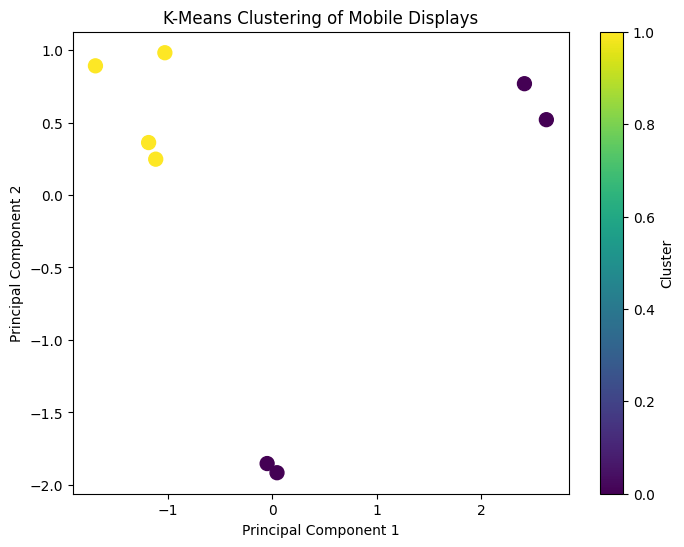

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load the mobile display data (if it's saved as CSV)
# For this example, we'll use the same data that we just created.
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (USD)': [799, 699, 799, 849, 599, 449, 350, 250]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
# We'll extract the width and height from the resolution string (e.g., "2532x1170" -> 2532, 1170)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (USD)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply K-Means clustering (let's try 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (USD)', 'Cluster']])

# Step 7: Visualize the clusters in 2D (using PCA for dimensionality reduction)
# We'll reduce the features to 2D for visualization purposes
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Mobile Displays')
plt.colorbar(label='Cluster')
plt.show()


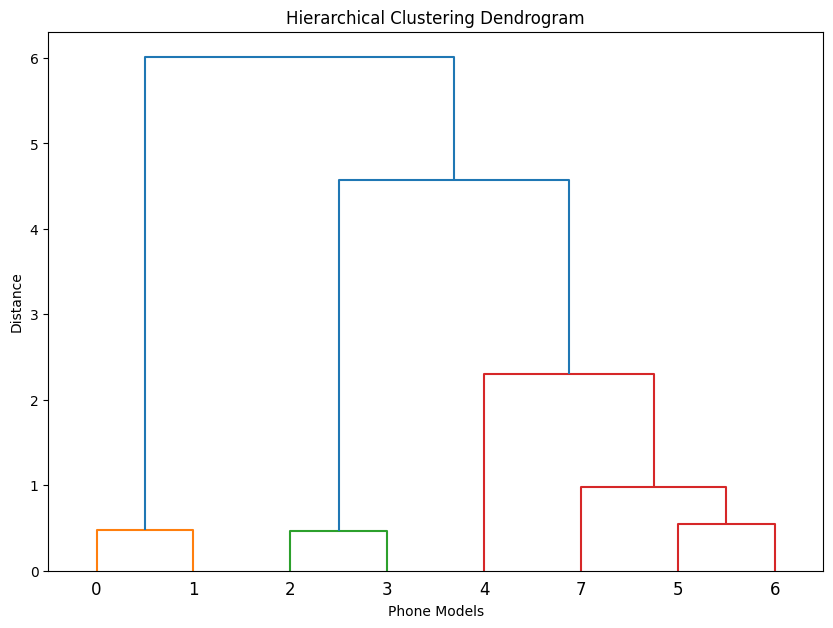

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900        0  
1               1170       69900        0  
2               1080       79900        0  
3               1080       84900        0  
4               1080       59900        0  
5               1080       44900        0  
6               1080       35000        0  
7               1080      

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Step 1: Load the mobile display data (same as before)
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Agglomerative Hierarchical Clustering
# Use distance_threshold instead of n_clusters
agglomerative_clustering = AgglomerativeClustering(distance_threshold=50, linkage='ward', n_clusters=None)
df['Cluster'] = agglomerative_clustering.fit_predict(scaled_features)

# Step 6: Visualize the dendrogram to understand the clustering hierarchy
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Phone Models')
plt.ylabel('Distance')
plt.show()

# Step 7: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Step 1: Load the CSV file
df = pd.read_csv('/student.csv')  # Replace with your actual CSV file path

# Step 2: Preprocess data (convert categorical features to numeric)
label_encoder = LabelEncoder()

# Convert 'Subject' and 'Name' to numeric values
df['SUBJECT'] = label_encoder.fit_transform(df['SUBJECT'])
df['NAME'] = label_encoder.fit_transform(df['NAME'])

# Step 3: Select relevant features for clustering
features = df[['CLASS', 'SUBJECT', 'ROLL NO', 'NAME']]

# Step 4: Perform Agglomerative Hierarchical Clustering
# n_clusters=None means the algorithm will decide the number of clusters based on distance threshold
agglomerative_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
df['Cluster'] = agglomerative_clustering.fit_predict(features)

# Step 5: Visualize the dendrogram to understand the hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering of Students')
plt.xlabel('Student Index')
plt.ylabel('Distance')
plt.show()

# Step 6: Display the DataFrame with cluster labels
print(df[['CLASS', 'SUBJECT', 'NAME', 'ROLL NO', 'Cluster']])


KeyError: 'SUBJECT'

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Sample loan dataset
data = {
    'Loan_ID': [1, 2, 3, 4, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Married': ['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'Dependents': [0, 1, 2, 0, 3, 2],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'Yes', 'No'],
    'ApplicantIncome': [3000, 4000, 5000, 2500, 6000, 4500],
    'CoapplicantIncome': [0, 1500, 0, 0, 2000, 1000],
    'LoanAmount': [150, 200, 250, 120, 300, 180],
    'Loan_Amount_Term': [360, 360, 360, 360, 180, 360],
    'Credit_History': [1, 1, 1, 0, 1, 1],
    'Property_Area': ['Urban', 'Semiurban', 'Rural', 'Urban', 'Semiurban', 'Rural'],
    'Loan_Status': ['Y', 'N', 'Y', 'N', 'Y', 'N']
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Preprocessing: Handle categorical data by encoding labels
label_encoder = LabelEncoder()

# Encode categorical features
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Replace '3+' with 3 in the Dependents column
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)

# Separate features and target variable
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop Loan_ID and Loan_Status (target variable)
y = df['Loan_Status']  # Target variable: Loan_Status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled data
clf.fit(X_train_res, y_train_res)

# Function to take user input and predict loan eligibility
def predict_loan_eligibility():
    print("\nPlease enter the following details to predict loan eligibility:")

    # Collect user input
    gender = input("Gender (Male/Female): ")
    married = input("Married (Yes/No): ")
    dependents = input("Dependents (0, 1, 2, or 3+): ")
    education = input("Education (Graduate/Not Graduate): ")
    self_employed = input("Self Employed (Yes/No): ")
    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_term = int(input("Loan Term (180 or 360): "))
    credit_history = int(input("Credit History (1 for good, 0 for bad): "))
    property_area = input("Property Area (Urban/Semiurban/Rural): ")

    # Map the input values to numerical encoding
    gender = label_encoder.transform([gender])[0]
    married = label_encoder.transform([married])[0]
    education = label_encoder.transform([education])[0]
    self_employed = label_encoder.transform([self_employed])[0]
    property_area = label_encoder.transform([property_area])[0]

    # If '3+' for dependents, treat as 3
    if dependents == '3+':
        dependents = 3
    else:
        dependents = int(dependents)

    # Prepare the user input for prediction
    user_input = [[gender, married, dependents, education, self_employed, applicant_income,
                   coapplicant_income, loan_amount, loan_term, credit_history, property_area]]

    # Predict loan eligibility
    prediction = clf.predict(user_input)

    # Display the prediction result
    if prediction == 1:
        print("\nLoan Approved!")
    else:
        print("\nLoan Rejected!")

# Run the function to predict loan eligibility based on user input
predict_loan_eligibility()



Please enter the following details to predict loan eligibility:
Gender (Male/Female): male
Married (Yes/No): no
Dependents (0, 1, 2, or 3+): 1
Education (Graduate/Not Graduate): Graduate
Self Employed (Yes/No): Yes
Applicant Income: 5000
Coapplicant Income: 2000
Loan Amount: 1000
Loan Term (180 or 360): 180
Credit History (1 for good, 0 for bad): 1
Property Area (Urban/Semiurban/Rural): Urban


ValueError: y contains previously unseen labels: 'male'